In [1]:
import os
# 設置 LOKY_MAX_CPU_COUNT 環境變量
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

請安裝
> pip install opencv-python

# Problem : K-Means Clustering

**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen-tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

1. (10%) For K =2,4, 8, 16, and 32, perform K-means clustering on the provided bird.jpg by taking the RGB values of each pixel as the feature of interest.Take a 64 x 64 pixel color image. For example, we have a total of 64 x 64 =4096 data points for K-means clustering, and each data point is described as a three dimensional vector (i.e., (R,G, B)). To visualize your image segmentation results, plot the clustering results by replacing all pixels' RGB value in each cluster with the that of the corresponding cluster center.
2. (6%) Repeat 1. but take both RGB values and the location (x and y) as a five dimensional vector as the feature for describing each pixel. Show the segmentation results.
3. (8%) Compare your results obtained in 1. and 2., and briefly explain the differences between the two methods under the same K. If further improved segmentation results would be desirable, please provide possible modification or extension to the above feature definition (and visualize your results).

使用K-Means聚類算法對影像進行分割，並根據不同的K值觀察聚類結果的變化。

## 1. 以RGB值作為特徵進行K-Means聚類

In [3]:
# 讀取圖片並調整大小為 64x64，並將BGR轉換為RGB
img = cv2.imread('./data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

一張 64x64 像素的圖片

每個像素點有三個顏色通道（R, G, B）

圖片的原始尺寸是 (64, 64, 3)

這表示有 4096（64x64）個像素點，每個像素點由 3 個值（R、G、B）表示

In [4]:
h, w, c = img.shape
print(img.shape)

(1024, 1024, 3)


將圖片reshape為(4096, 3)的形狀

這樣可以將每個像素的RGB值轉換成一個向量

並把整張圖片轉換成 4096 個這樣的向量

這些向量代表了我們要進行 K-Means 聚類的數據點

In [5]:
# 將圖片轉換為(4096,3)的陣列，其中3為RGB通道
img_array = img.reshape(-1, 3).astype(np.float32)
img_array.shape

(1048576, 3)

### K=2

In [6]:
def km_clust(array, n_clusters):   
    # 定義 K-Means 聚類問題
    k_m = KMeans(n_clusters=n_clusters)
    # 進行聚類
    k_m.fit(array)
    # 取得聚類中心並轉換為uint8類型
    # RGB值在0-255之間，使用uint8確保範圍
    center = np.uint8(k_m.cluster_centers_)
    # 取得每個點的標籤
    label = k_m.labels_
    return label, center

In [7]:
K = 2
label, center = km_clust(img_array, K)
print(f'Label: {label}')
print(f'Label Shape: {label.shape}')
print(f'Center: {center}')

# 以聚類中心的RGB值取代像素的RGB值
# 將每個像素的原始顏色值替換為它所屬的聚類中心的顏色值
segmented_img = center[label.flatten()]
# 將扁平化的陣列重塑為原始影像的形狀(64, 64, 3)
segmented_img = segmented_img.reshape(img.shape)

Label: [0 0 0 ... 0 0 0]
Label Shape: (1048576,)
Center: [[163 197 120]
 [107  95  71]]


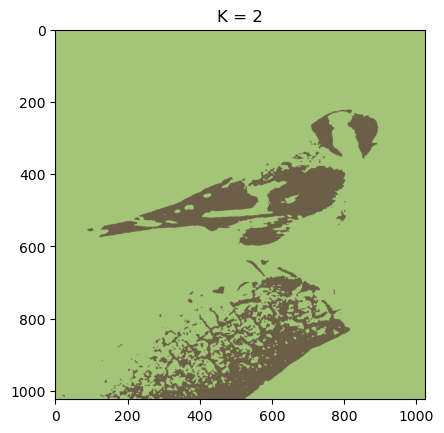

In [8]:
plt.figure()
plt.title(f'K = {K}')
plt.imshow(segmented_img)

### 不同的K值

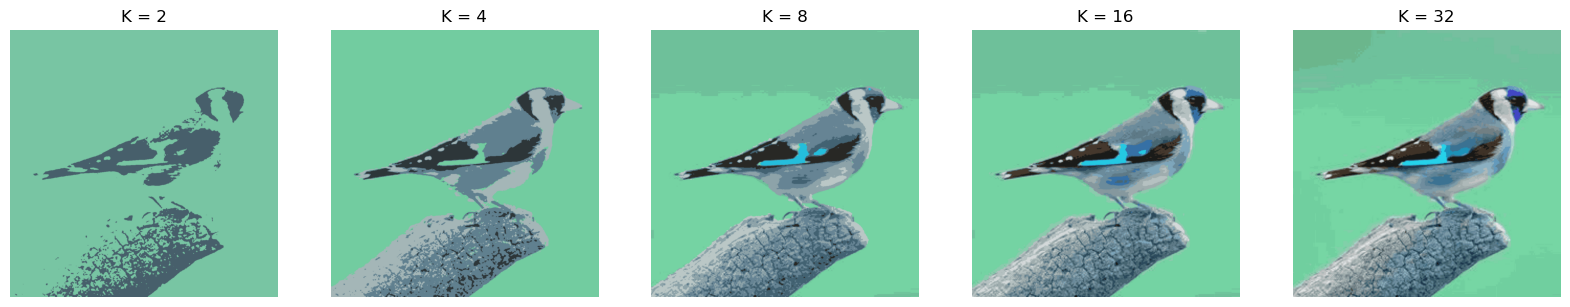

In [9]:
# 設定不同的 K 值
K_values = [2, 4, 8, 16, 32]

plt.figure(figsize=(20, 4))

for i, K in enumerate(K_values):
    # 設置 K-Means 條件
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(img_array, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # 用聚類中心的 RGB 值替換像素的 RGB 值
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape((img.shape))
    
    # 顯示結果
    plt.subplot(1, len(K_values), i + 1)
    plt.title(f'K = {K}')
    plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.show()

## 2. 以RGB值和位置(x, y)作為特徵進行K-Means聚類

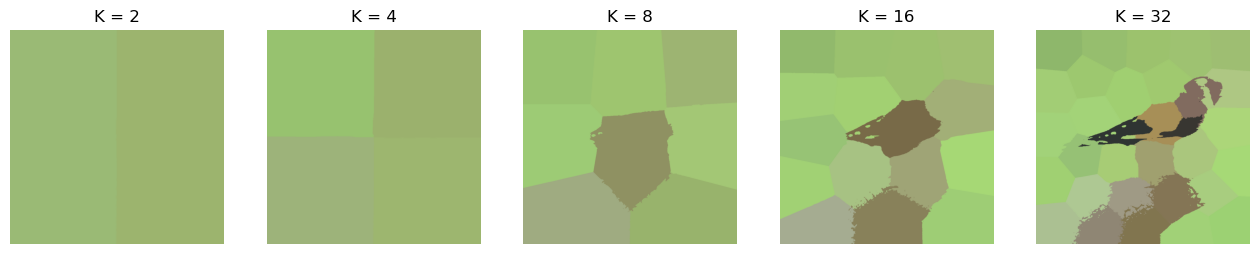

In [10]:
# 讀取圖片並調整大小為 64x64，BGR轉為RGB(OpenCV讀取影像是BGR)
img = cv2.imread('./data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def km_clust(array, n_clusters):   
    # 定義 K-Means 聚類問題
    k_m = KMeans(n_clusters=n_clusters)
    # 進行聚類
    k_m.fit(array)
    # 取得聚類中心並轉換為uint8類型
    # RGB值在0-255之間，使用uint8確保範圍
    center = np.uint8(k_m.cluster_centers_)
    # 取得每個點的標籤
    label = k_m.labels_
    return label, center

h, w, c = img.shape

# 加入位置資訊
Z = np.zeros((h, w, c+2))
for i in range(h):
    for j in range(w):
        Z[i][j] = np.append(img[i][j], [[i], [j]])
Z = Z.reshape(-1, 5)

Ks = [2, 4, 8, 16, 32]
plt.figure(figsize=(16, 12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # 將聚類結果還原成影像
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape(img.shape)

    plt.subplot(1, 5, i + 1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)

plt.show()

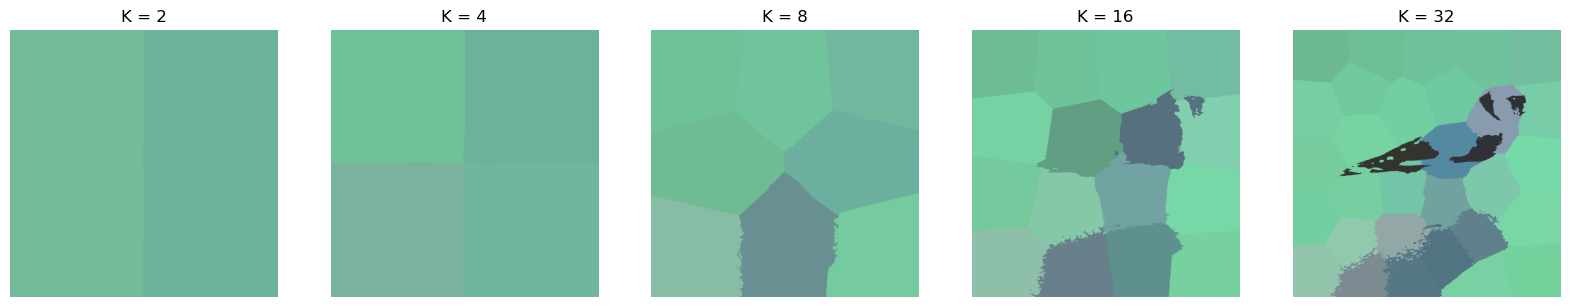

In [11]:
# 讀取圖片並調整大小為 64x64，並將BGR轉換為RGB
img = cv2.imread('./data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 獲取影像的高度、寬度和通道數
h, w, c = img.shape
# 將影像的RGB資料展開為一維數組，並轉換為float32類型
img_array = img.reshape(-1, 3).astype(np.float32)

# 加入位置資訊
x_coords, y_coords = np.meshgrid(np.arange(w), np.arange(h))
x_coords = x_coords.flatten()
y_coords = y_coords.flatten()

# 組合成五維向量 (R, G, B, x, y)
pixels_with_position = np.column_stack((img_array, x_coords, y_coords))

# 設定不同的 K 值
K_values = [2, 4, 8, 16, 32]

plt.figure(figsize=(20, 4))

for i, K in enumerate(K_values):
    # 設置 K-Means 條件
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixels_with_position.astype(np.float32), K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # 用聚類中心的 RGB 值替換像素的 RGB 值
    centers = np.uint8(centers[:, :3])  # 只保留 RGB 部分
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape((img.shape))
    
    # 顯示結果
    plt.subplot(1, len(K_values), i + 1)
    plt.title(f'K = {K}')
    plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.show()

## 3. 比較K-Means聚類效果

1. 不同K值下，僅使用RGB特徵
2. 不同K值下，使用RGB與原始位置(x, y)特徵

![](images/7.4_result.PNG)

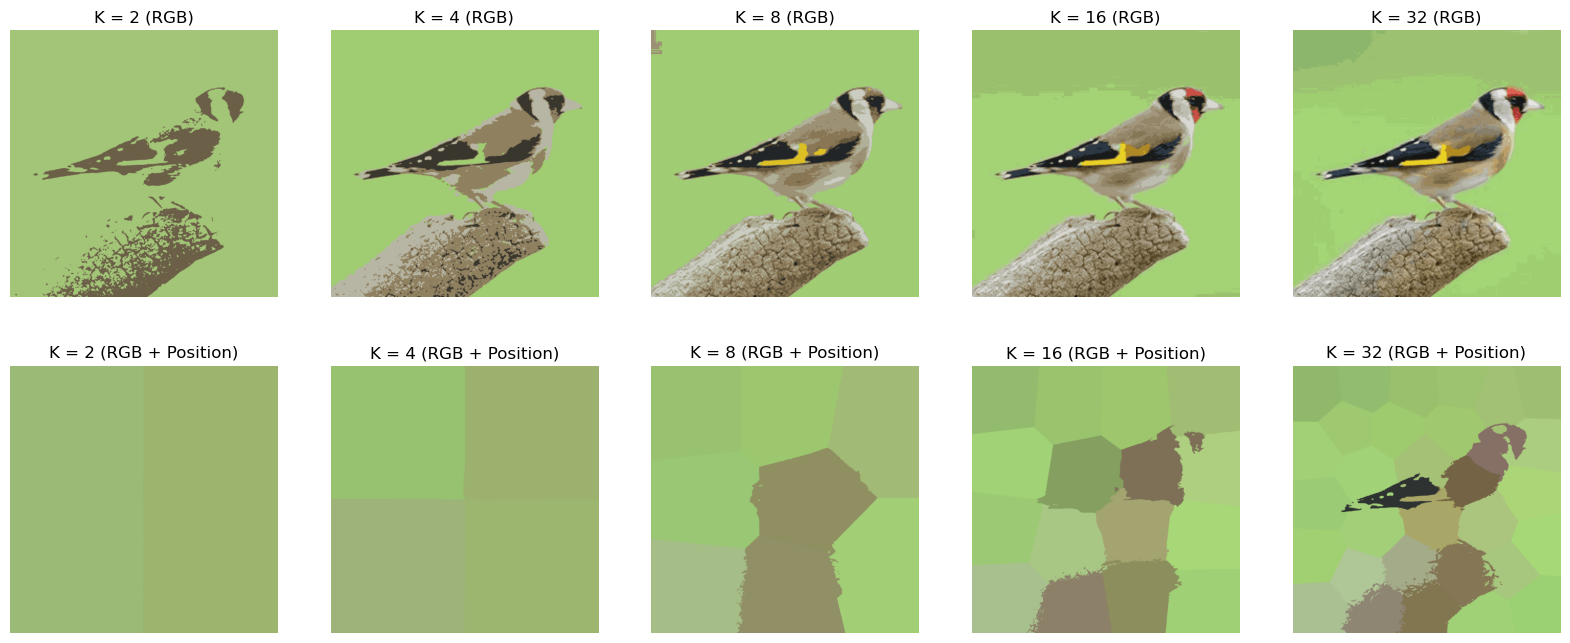

In [12]:
# 讀取圖片
img = cv2.imread('./data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w, c = img.shape
img_array = img.reshape(-1, 3).astype(np.float32)

# 設定不同的K值
K_values = [2, 4, 8, 16, 32]

# 加入原始位置資訊
x_coords, y_coords = np.meshgrid(np.arange(w), np.arange(h))
x_coords = x_coords.flatten().astype(np.float32)
y_coords = y_coords.flatten().astype(np.float32)

# 組合成五維向量(R, G, B, x, y)
pixels_with_position = np.column_stack((img_array, x_coords, y_coords))

plt.figure(figsize=(20, 8))

for i, K in enumerate(K_values):
    # 僅使用 RGB 特徵
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(img_array, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape((h, w, 3))
    
    plt.subplot(2, len(K_values), i + 1)
    plt.title(f'K = {K} (RGB)')
    plt.imshow(segmented_image)
    plt.axis('off')

    # 使用 RGB + 原始位置(x, y)特徵
    _, labels, centers = cv2.kmeans(pixels_with_position.astype(np.float32), K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers[:, :3])
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape((h, w, 3))
    
    plt.subplot(2, len(K_values), i + 1 + len(K_values))
    plt.title(f'K = {K} (RGB + Position)')
    plt.imshow(segmented_image)
    plt.axis('off')

plt.show()

# 優化: 縮小圖片尺寸至256

In [13]:
img = cv2.imread('./data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(f'Original(1024*1024): {img.shape}')

# 縮小圖片尺寸至 w/4, h/4
img_small = cv2.resize(img, (img.shape[1] // 4, img.shape[0] // 4))
h, w, c = img_small.shape
print(f'Small(256*256): {img_small.shape}')

img_array = img_small.reshape(-1, 3).astype(np.float32)

Original(1024*1024): (1024, 1024, 3)
Small(256*256): (256, 256, 3)


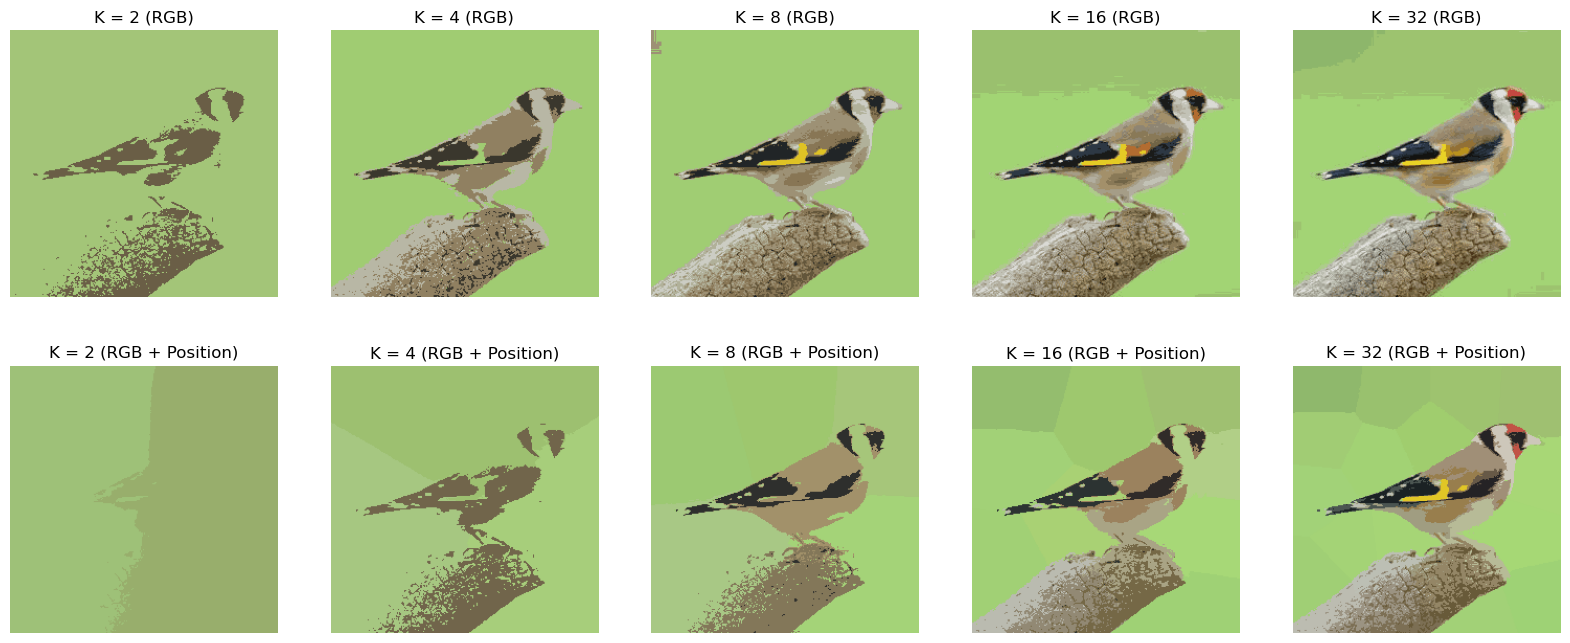

In [14]:
# 設定不同的K值
K_values = [2, 4, 8, 16, 32]

# 加入縮小後的原始位置資訊
x_coords, y_coords = np.meshgrid(np.arange(w), np.arange(h))
x_coords = x_coords.flatten().astype(np.float32)
y_coords = y_coords.flatten().astype(np.float32)

# 組合成五維向量(R, G, B, x, y)
pixels_with_position = np.column_stack((img_array, x_coords, y_coords))

plt.figure(figsize=(20, 8))

for i, K in enumerate(K_values):
    # 僅使用 RGB 特徵
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(img_array, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape((h, w, 3))
    
    plt.subplot(2, len(K_values), i + 1)
    plt.title(f'K = {K} (RGB)')
    plt.imshow(segmented_image)
    plt.axis('off')

    # 使用 RGB + 原始位置(x, y)特徵
    _, labels, centers = cv2.kmeans(pixels_with_position, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers[:, :3])
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape((h, w, 3))
    
    plt.subplot(2, len(K_values), i + 1 + len(K_values))
    plt.title(f'K = {K} (RGB + Position)')
    plt.imshow(segmented_image)
    plt.axis('off')

plt.show()